# Prepare data

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from preparation import prepare_data, select_by_date_interval
from plotting import h_bar_plot, get_videos_per_h, month_bar_plot, get_videos_per_month, stacked_bar_with_labels

In [93]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [94]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df= prepare_data(PATH)

# start_date = "2022-08-01"
# end_date = "2022-09-30"
# df = select_by_date_interval(df0, start=start_date)
df = df.loc[df["app"] == "YouTube Music"] # if you wanna work only with YT Music data
df

,video_title,channel_name,time,app
0,Герої,Riffmaster,2022-10-22 15:27:20.264000+03:00,YouTube Music
1,Kozak System - Сила і Зброя,kozaksystem,2022-10-22 15:24:47.497000+03:00,YouTube Music
7,YARMAK - Потрібен живим,Yarmak Music,2022-10-22 13:53:48.193000+03:00,YouTube Music
8,YARMAK - ДИКЕ ПОЛЕ(FT. ALISA),Yarmak Music,2022-10-22 13:50:20.587000+03:00,YouTube Music
11,Арта,Пирятин,2022-10-22 13:24:06.212000+03:00,YouTube Music
...,...,...,...,...
5716,Ptaha Fred,The Unsleeping,2022-06-13 16:26:56.439000+03:00,YouTube Music
6406,Остановіть ви цю ху..ню!,Мюслі UA,2022-05-24 22:04:42.747000+03:00,YouTube Music
6407,Потрібен живим,YARMAK,2022-05-24 22:01:35.183000+03:00,YouTube Music
6408,Арта,Пирятин,2022-05-24 22:00:08.821000+03:00,YouTube Music


In [95]:
# df['channel_name'].str.replace(' - Topic', '')

# Count on how many videos you clicked per channel

In [96]:
counts = df["channel_name"].value_counts()
counts

Тартак                          96
J. S. Hopkins, J. S. Hopkins    95
KALUSH                          86
Various Artists                 83
Riffmaster                      65
                                ..
Mistmorn                         1
Troy Baker                       1
Lordi                            1
Mediaeval Baebes                 1
MrMoMMusic                       1
Name: channel_name, Length: 213, dtype: Int64

# Break into categories

In [97]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)

df2 = pd.DataFrame({"video_count": counts, "interval": intervals})
df2

,video_count,interval
Тартак,96,>50
"J. S. Hopkins, J. S. Hopkins",95,>50
KALUSH,86,>50
Various Artists,83,>50
Riffmaster,65,>50
...,...,...
Mistmorn,1,1
Troy Baker,1,1
Lordi,1,1
Mediaeval Baebes,1,1


# Plot percentage of categories

In [114]:
# Use reindex here, so values get ordered by labels not count
interval_count = df2["interval"].value_counts().reindex(names)
percentage = interval_count/len(df2)
percentage

1        0.497653
2-5      0.169014
6-10     0.117371
11-20    0.079812
21-50    0.098592
>50      0.037559
Name: interval, dtype: float64

<AxesSubplot:title={'center':'Videos per channel'}, ylabel='interval'>

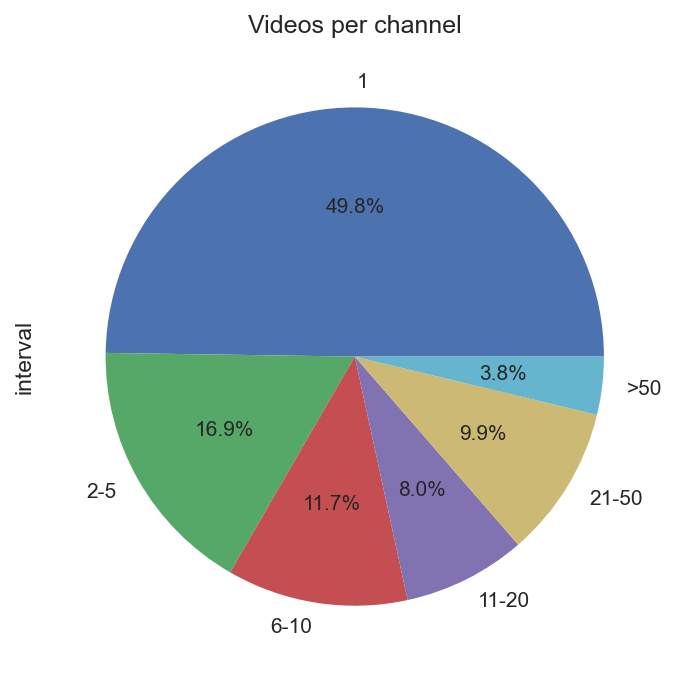

In [115]:
percentage.plot.pie(autopct='%1.1f%%', title="Videos per channel")

# Plot n most watched channels

1193

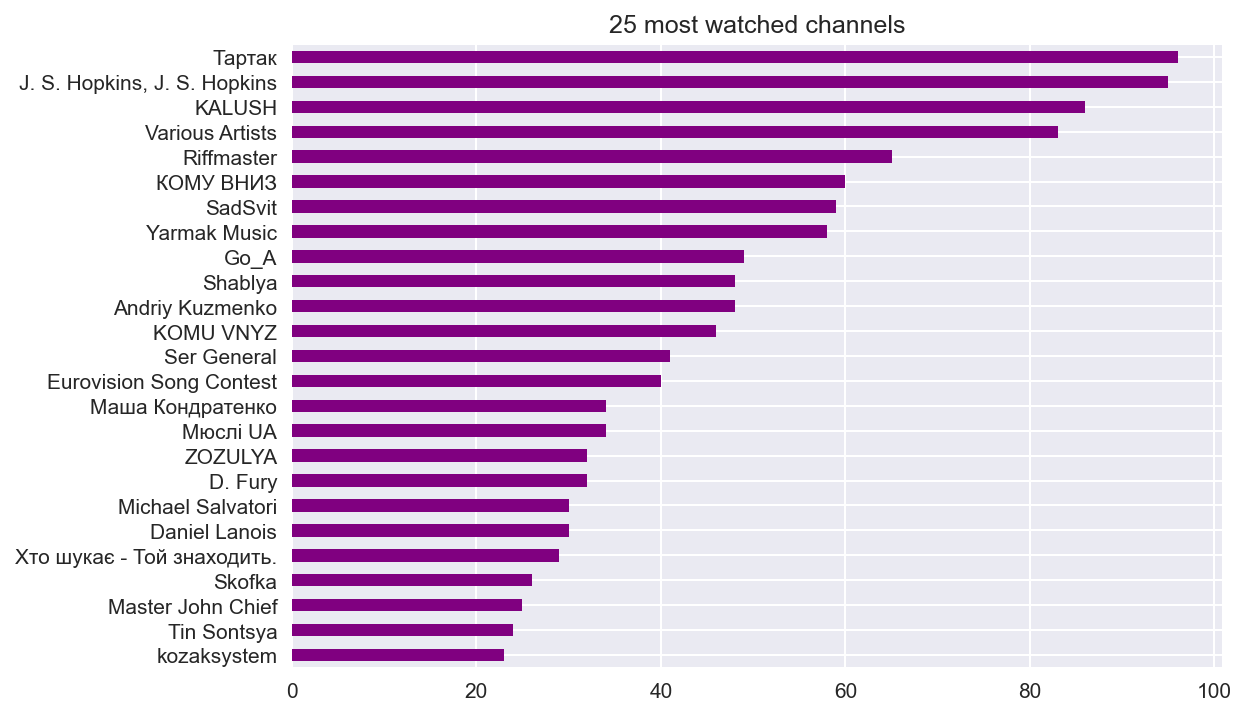

In [100]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

# Count on how many videos you clicked per hour

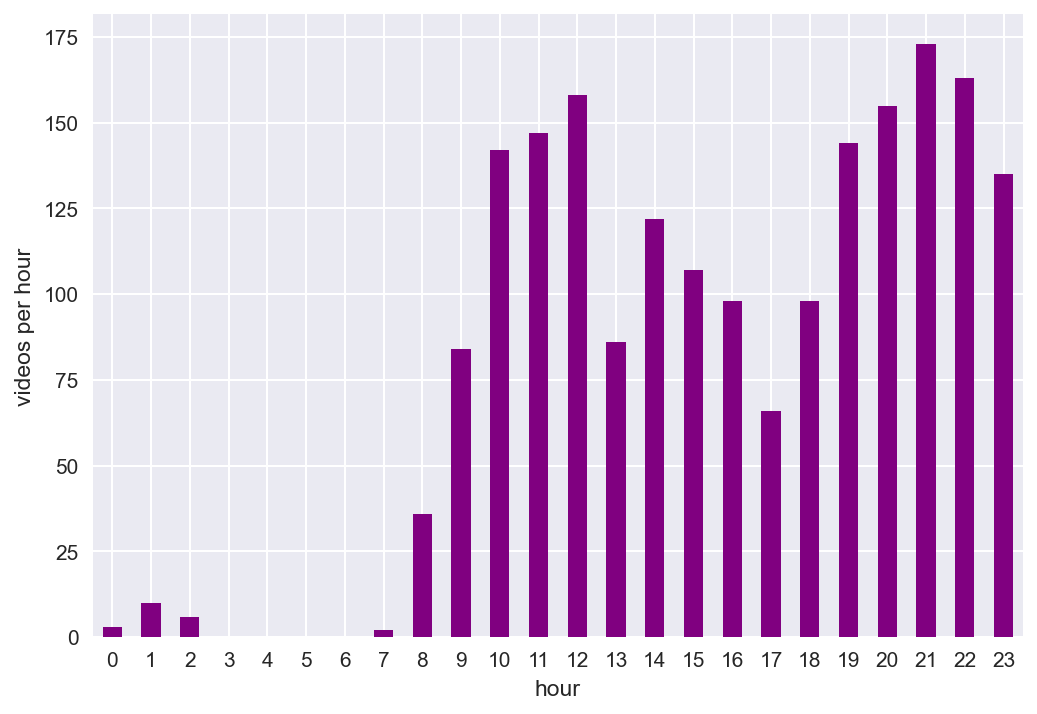

In [101]:
h_bar_plot(df)

# Discover at what hours you watch a particular channel 

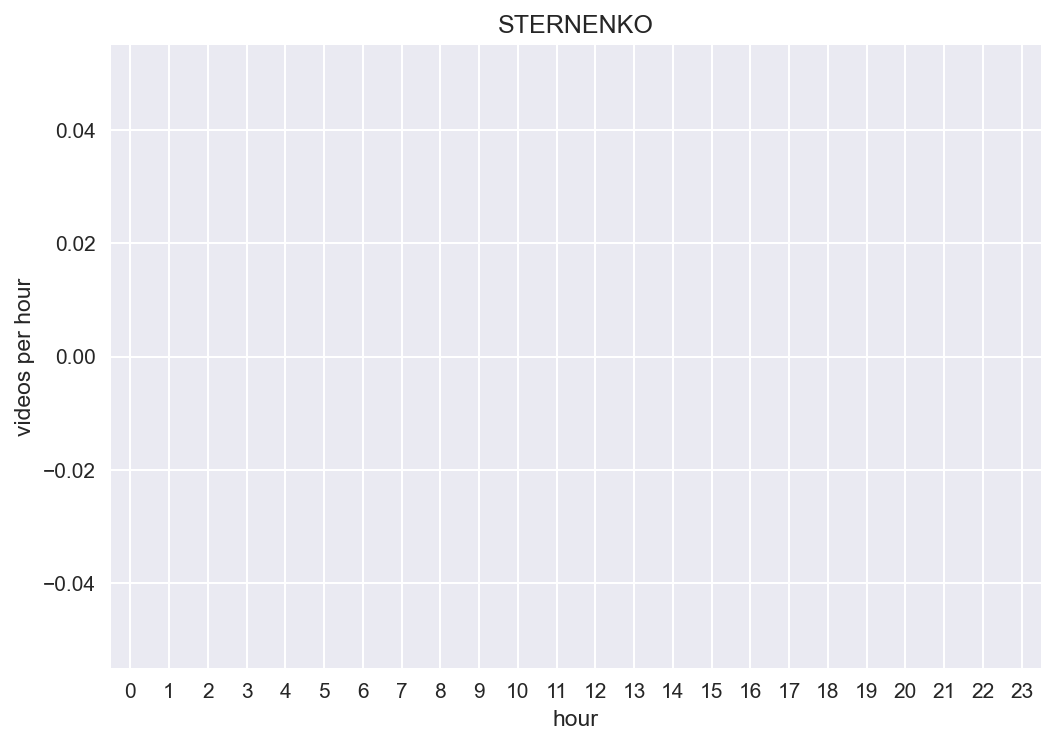

In [102]:
channel_name_to_look = "STERNENKO"
h_bar_plot(df, channel_name_to_look)

# Plot videos count per hour for several channels

In [103]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels[:10]

['Тартак',
 'J. S. Hopkins, J. S. Hopkins',
 'KALUSH',
 'Various Artists',
 'Riffmaster',
 'КОМУ ВНИЗ',
 'SadSvit',
 'Yarmak Music',
 'Go_A',
 'Shablya']

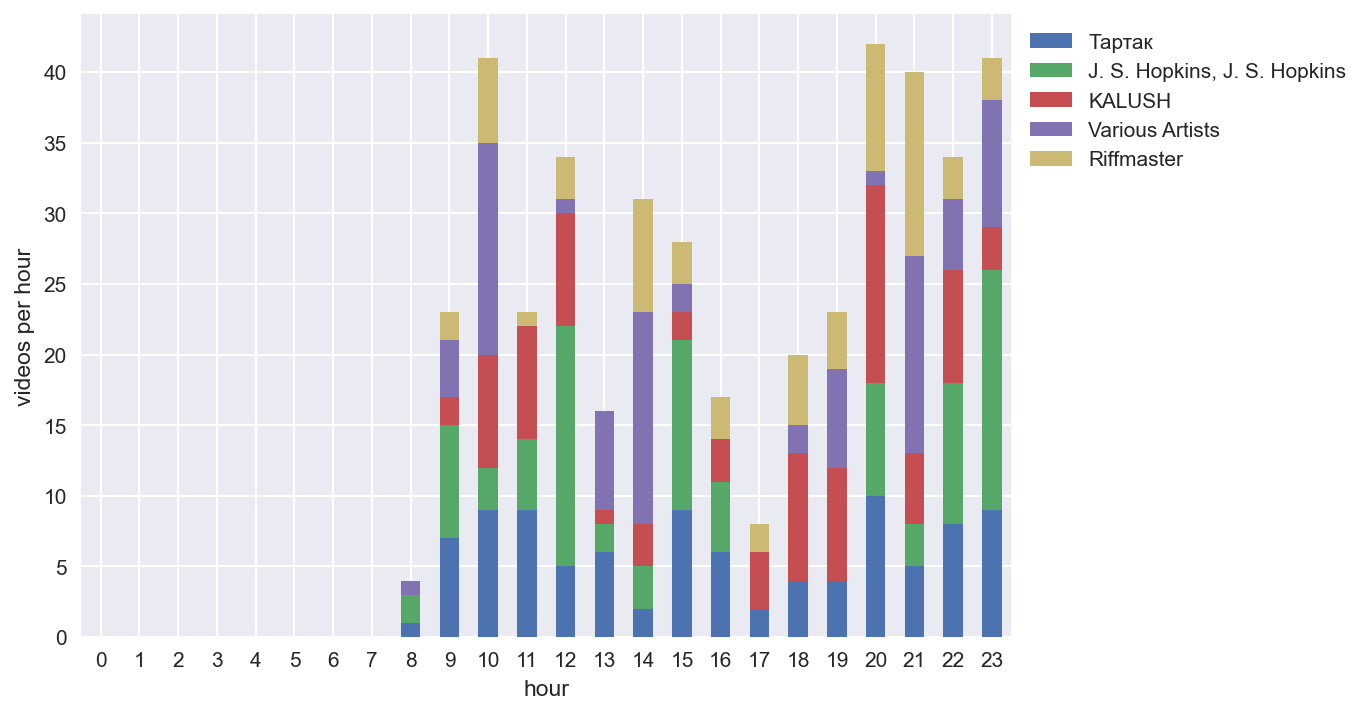

In [104]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

# Count how many videos you click per day of week

<AxesSubplot:>

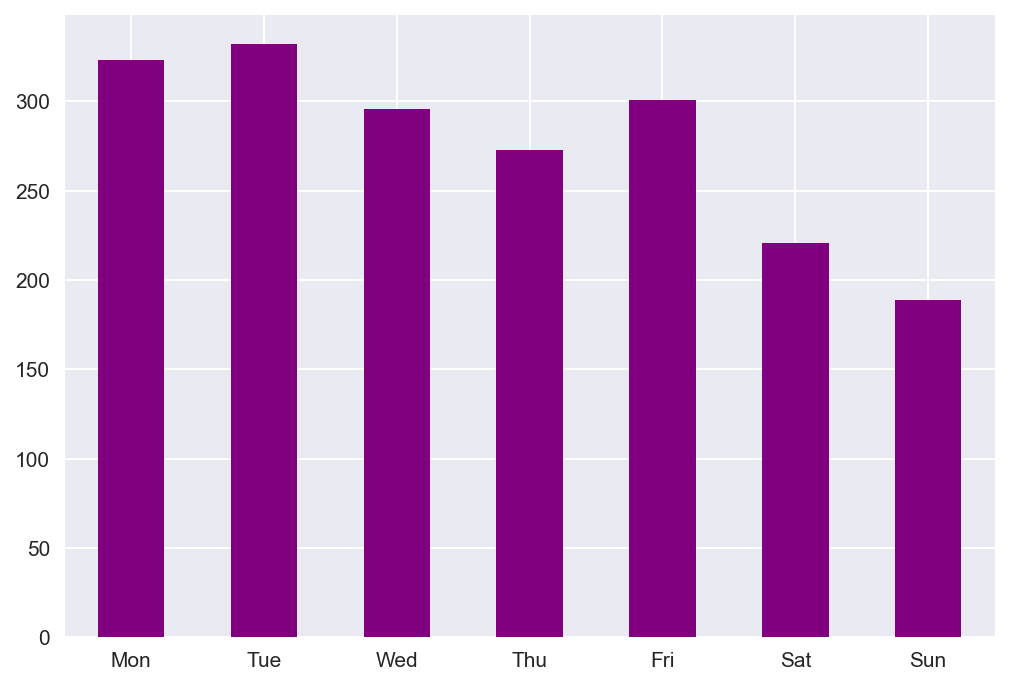

In [105]:
df['weekday'] = df['time'].dt.strftime('%a')
total = len(df["weekday"])
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)

# Change in use of a particular channel over months (Use all data for this!)

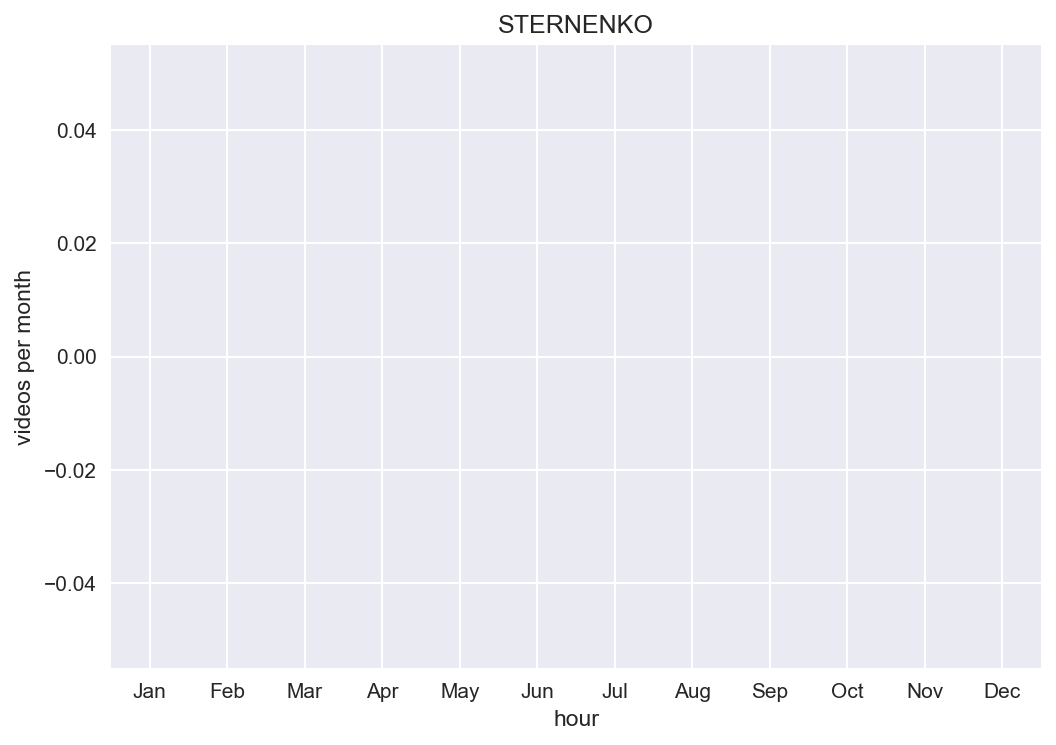

In [106]:
channel_name = "STERNENKO"
month_bar_plot(df, channel_name)

# See how many videos you watched/listened to in YT and YT music over months

In [107]:
yt_df = df.loc[df["app"] == "YouTube"]
yt = get_videos_per_month(yt_df)
music_df = df.loc[df["app"] == "YouTube Music"]
music = get_videos_per_month(music_df)

months = yt.index.tolist()
yt_use_progress = pd.DataFrame({"YT": yt, "YT Music": music}, index=months) 

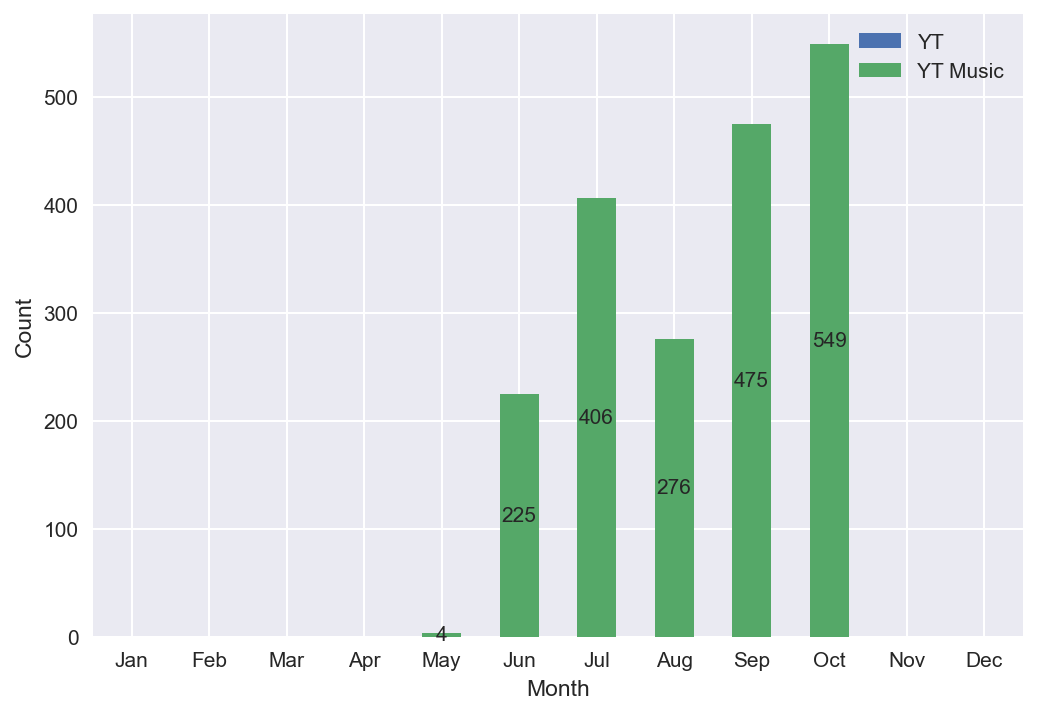

In [108]:
stacked_bar_with_labels(yt_use_progress[["YT", "YT Music"]])

# See how your use of YT music changed in percentages over months

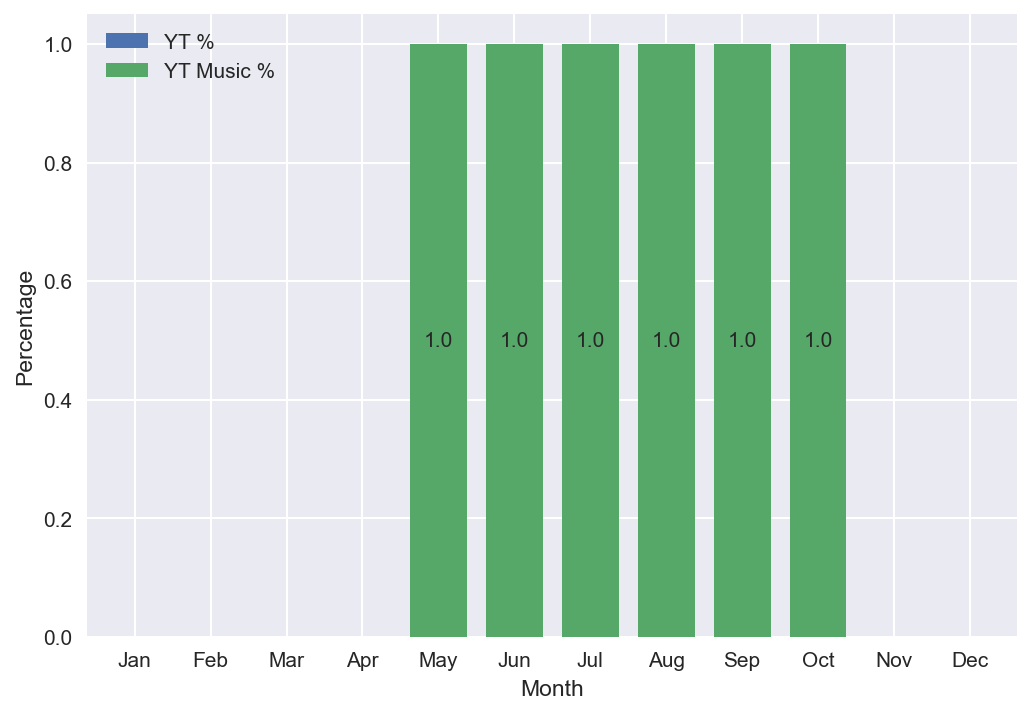

In [109]:
yt_use_progress["Total"] = yt_use_progress["YT"] + yt_use_progress["YT Music"]
yt_use_progress["YT %"] = yt_use_progress["YT"] / yt_use_progress["Total"]
yt_use_progress["YT Music %"] = yt_use_progress["YT Music"] / yt_use_progress["Total"]
yt_use_progress = yt_use_progress.round(3) # round all floats in df to 3 places

stacked_bar_with_labels(yt_use_progress[["YT %", "YT Music %"]], float_num=True, bar_width=0.75)